# An Introduction to Data Visualization

In this first demonstration, we will introduce some basic tenchniques in visualizing data with Python libraries

1.   NumPy for mathmatical operations (tutorial: https://numpy.org/devdocs/user/quickstart.html)
2.   Pandas for data manipulation (tutorial: https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
3.   Matplotlib for making plots (tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html)

We will use these libraries for visualizaing COVID-19 data so it is important to know their basics.


## Import Libraries

In [0]:
# Import some basic modules that we will use in this demonstration

import numpy as np # for all mathematical operations
import pandas as pd # for and read in and manipulating data
import matplotlib.pyplot as plt # for all our plotting needs

# Magic functions for printing high quality plots in the notebook
# They are not Python codes
%matplotlib inline 
%config InlineBackend.figure_format = "retina"

## Navigate Raw Data


We will be using the price of avocado in this demosntration. The dataset that we will be using can be downloaded at https://raw.githubusercontent.com/ylin910095/data_visualization_2020/master/csv/avocado_price/avocado.csv

A description of the dataset can be found at https://www.kaggle.com/neuromusic/avocado-prices


## Manipulate Raw Data with Pandas

The data are recorded in the csv format (comma-separated-values, see https://en.wikipedia.org/wiki/Comma-separated_values). They can be parsed easily by Panda to put into a `DataFrame` (aka table) stucture.

In [0]:
# Read in data and see the first 10 data entries
data_url = "https://raw.githubusercontent.com/ylin910095/data_visualization_2020/master/csv/avocado_price/avocado.csv"
df = pd.read_csv(data_url) # df variable is be your data table
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [0]:
df['AveragePrice'] # select the AveragePrice column

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [0]:
df[['Date','AveragePrice']] # select the Date and AveragePrice columns

,Date,AveragePrice
0,2015-12-27,1.33
1,2015-12-20,1.35
2,2015-12-13,0.93
3,2015-12-06,1.08
4,2015-11-29,1.28
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


In [0]:
df.iloc[46] # select the 46th row in the table

Unnamed: 0                46
Date              2015-02-08
AveragePrice            0.99
Total Volume           51254
4046                 1357.37
4225                 39111.8
4770                  163.25
Total Bags           10621.5
Small Bags           10113.1
Large Bags            508.44
XLarge Bags                0
type            conventional
year                    2015
region                Albany
Name: 46, dtype: object

In [0]:
#df['region'].unique()
df['region'].unique() # find out all possible regions

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [0]:
df[(df['region'] == 'Chicago')] # show only the chicago entries

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
416,0,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago
417,1,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago
418,2,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago
419,3,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago
420,4,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17704,7,2018-02-04,1.62,46956.84,313.29,32668.25,0.00,13975.30,13975.30,0.00,0.00,organic,2018,Chicago
17705,8,2018-01-28,1.72,40770.94,215.40,31318.93,0.00,9236.61,9236.61,0.00,0.00,organic,2018,Chicago
17706,9,2018-01-21,1.82,36688.67,83.93,28134.16,0.00,8470.58,8470.58,0.00,0.00,organic,2018,Chicago
17707,10,2018-01-14,1.79,44955.89,133.39,31177.44,0.00,13645.06,13635.06,10.00,0.00,organic,2018,Chicago


In [0]:
df[(df['region'] == 'Chicago') & (df['type'] == 'organic')] # show only the chicago region with AveragePrice > 1.0

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9542,0,2015-12-27,1.58,20995.37,1064.71,19320.66,0.0,610.00,610.00,0.00,0.0,organic,2015,Chicago
9543,1,2015-12-20,1.58,22452.30,730.65,21574.99,0.0,146.66,143.33,3.33,0.0,organic,2015,Chicago
9544,2,2015-12-13,1.59,24059.71,876.48,23109.90,0.0,73.33,73.33,0.00,0.0,organic,2015,Chicago
9545,3,2015-12-06,1.59,27081.13,819.66,26104.80,0.0,156.67,156.67,0.00,0.0,organic,2015,Chicago
9546,4,2015-11-29,1.59,22168.32,457.29,21677.70,0.0,33.33,33.33,0.00,0.0,organic,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17704,7,2018-02-04,1.62,46956.84,313.29,32668.25,0.0,13975.30,13975.30,0.00,0.0,organic,2018,Chicago
17705,8,2018-01-28,1.72,40770.94,215.40,31318.93,0.0,9236.61,9236.61,0.00,0.0,organic,2018,Chicago
17706,9,2018-01-21,1.82,36688.67,83.93,28134.16,0.0,8470.58,8470.58,0.00,0.0,organic,2018,Chicago
17707,10,2018-01-14,1.79,44955.89,133.39,31177.44,0.0,13645.06,13635.06,10.00,0.0,organic,2018,Chicago


In [0]:
df[(df['region'] == 'Chicago') | (df['region'] == 'Detroit')] # show the entries from Chicago and Detroit

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
416,0,2015-12-27,0.93,661137.13,42799.00,445218.79,78378.25,94741.09,83066.75,1617.67,10056.67,conventional,2015,Chicago
417,1,2015-12-20,0.91,690669.34,35724.99,464574.15,96306.30,94063.90,76241.25,9592.65,8230.00,conventional,2015,Chicago
418,2,2015-12-13,1.07,668601.50,40380.09,451470.42,94162.53,82588.46,76829.42,5693.75,65.29,conventional,2015,Chicago
419,3,2015-12-06,1.14,664020.49,53173.18,455048.11,92888.37,62910.83,62473.12,420.95,16.76,conventional,2015,Chicago
420,4,2015-11-29,1.11,602481.22,42851.47,422479.32,74988.97,62161.46,61862.57,298.89,0.00,conventional,2015,Chicago
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17764,7,2018-02-04,1.32,17541.66,580.19,2434.85,0.00,14480.83,13820.72,660.11,0.00,organic,2018,Detroit
17765,8,2018-01-28,1.29,20073.36,738.01,3026.96,0.00,16298.93,12972.63,3326.30,0.00,organic,2018,Detroit
17766,9,2018-01-21,1.41,22121.43,826.25,3379.62,0.00,17890.60,11215.49,6675.11,0.00,organic,2018,Detroit
17767,10,2018-01-14,1.32,20636.96,750.22,3266.56,0.00,16598.98,15422.79,1176.19,0.00,organic,2018,Detroit


See https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html for many more operations.

## Visualize Data with Matplotlib

Matplotlib is the most widely-used plotting library in the Python. Pandas integrates some functions of Matplotlib to make plotting easier.

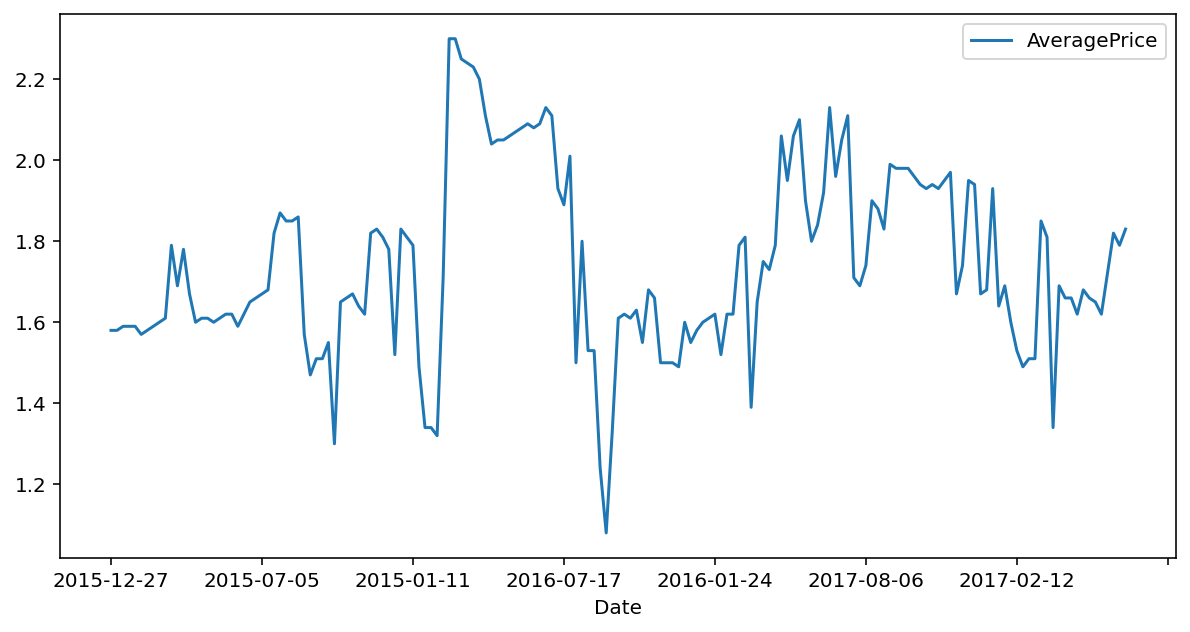

In [0]:
# A simple line plot showing the average price of organic avocados in Chicago overtime
x = 'Date'
y = 'AveragePrice'
chicago_df = df[(df['region'] == 'Chicago') & (df['type'] == 'organic')] # select chicago entries
ax = chicago_df.plot(x=x, y=y, figsize=(10,5))
plt.show()

`ax` variable in the code above is the basic object of matplotlib that represent the 2D graph we are plotting. Some basic functions that we will be using are 

*   `ax.plot(x, y, ...)` to add a basic line plot to the axis
*   `ax.scatter(x, y, ...)`  to add a basic scatter plot to the axis
*   `ax.bar(x, height, ...)` to add a bar graph to the axis
*   `ax.set_xlabel(label, ...)` to set the x-axis label
*   `ax.set_ylabel(label, ...)` to set the y-axis label
*   `ax.set_yscale('log')` to set the y-axis scale to logarithmic 

For more options, see https://matplotlib.org/3.1.1/api/axes_api.html or Google.

We also can also use the buildin plotting functions of `Dataframe` in Pandas, `df.plot(x=x, y=y, kind=kind, ...)` to make basic plots. For example, `kind=bar` will plot a bar graph with given `x` and `y`. See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details.





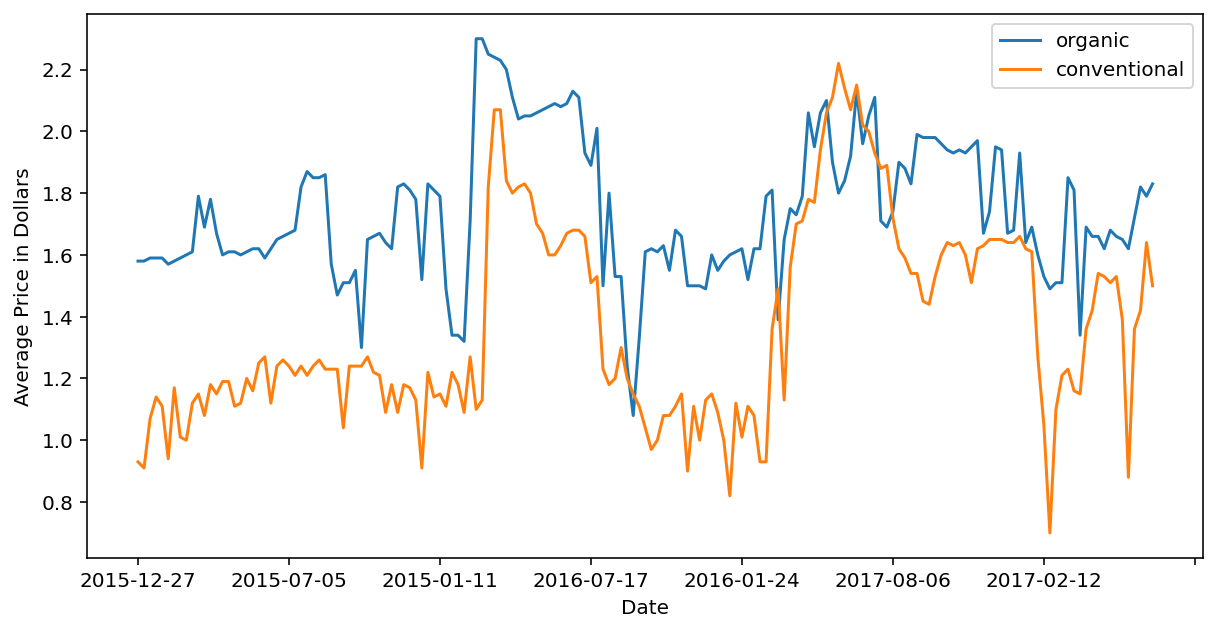

In [0]:
# You can also add more lines to a plot

# First plot the organic avocado price
x = 'Date'
y = 'AveragePrice'
chicago_df = df[(df['region'] == 'Chicago') & 
                (df['type'] == 'organic')] 
ax = chicago_df.plot(x=x, y=y, figsize=(10,5), label='organic') # remember to label it!

# Then add the same conventional to the same matplotlib axis
conventional_df = df[(df['region'] == 'Chicago') & 
                     (df['type'] == 'conventional')] 
conventional_df.plot(x=x, y=y, ax=ax, label='conventional') # use the same axies with ax=ax

# Label your graph to people know what we are plotting
ax.set_xlabel("Date") # x-axis
ax.set_ylabel("Average Price in Dollars") # y-axis
plt.show()

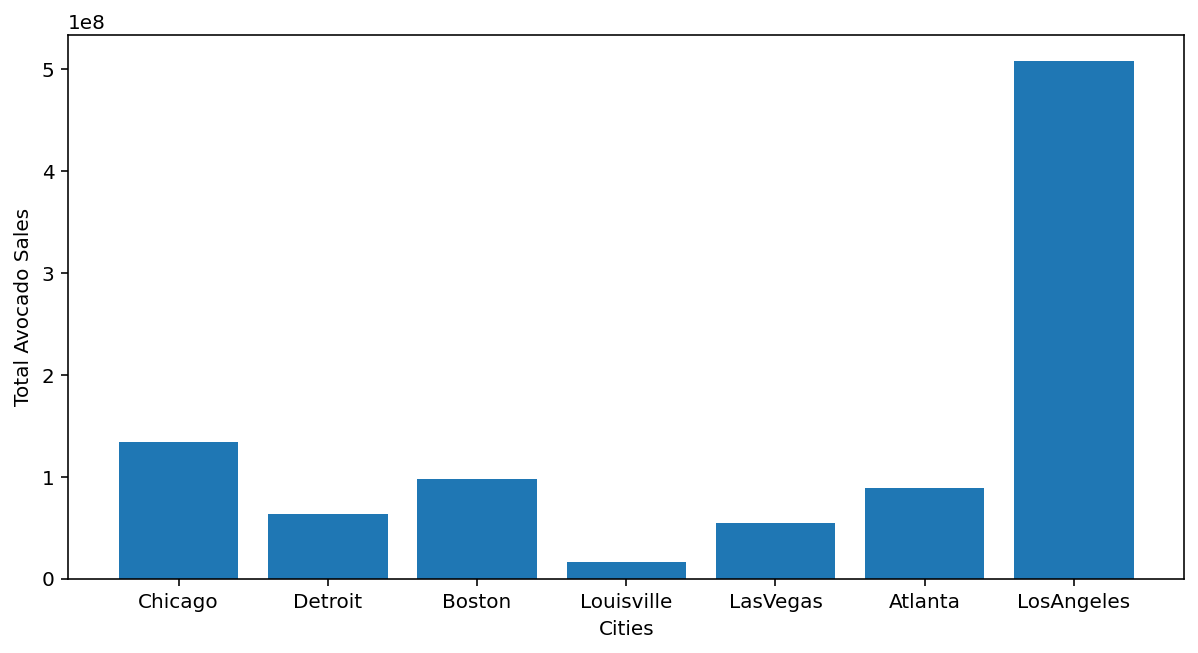

In [0]:
# We can also make a bar graph comparing the total sales of different citys

# Make a list of different cities
cities = ['Chicago', 'Detroit', 'Boston', 'Louisville', 'LasVegas', 'Atlanta',
          'LosAngeles']

# Initialize the empty list to keep the numbers
total_sales = [] 

# Figure out the total volume for each city
for city in cities:
  # First restrict our table to the relevant city 
  temp_df = df[(df['region'] == city)]

  # Then we can sum the total volume in each of these tables
  total_sale = temp_df['Total Volume'].sum()
  total_sales.append(total_sale) # append the record


# Plot the bar graph using matplotlib functions
fig, ax = plt.subplots(figsize=(10,5)) # initilize a matplotlib axis
ax.bar(x=cities, height=total_sales) # add a plot to the axis

# Label your graph
ax.set_xlabel('Cities')
ax.set_ylabel('Total Avocado Sales')
plt.show()
  

What conclusion you can and cannot draw from this plot?

## Warm-up exercise (5 minutes)

Create an appropriate graph to compare the average price of organic avocadoes in Chicago, Detroit, Boston, Louisville, LasVegas, Atlanta, and LosAngeles over the time period of this dataset

(Hint:
`df[column_name].mean()` will average over the column of a given dataframe)

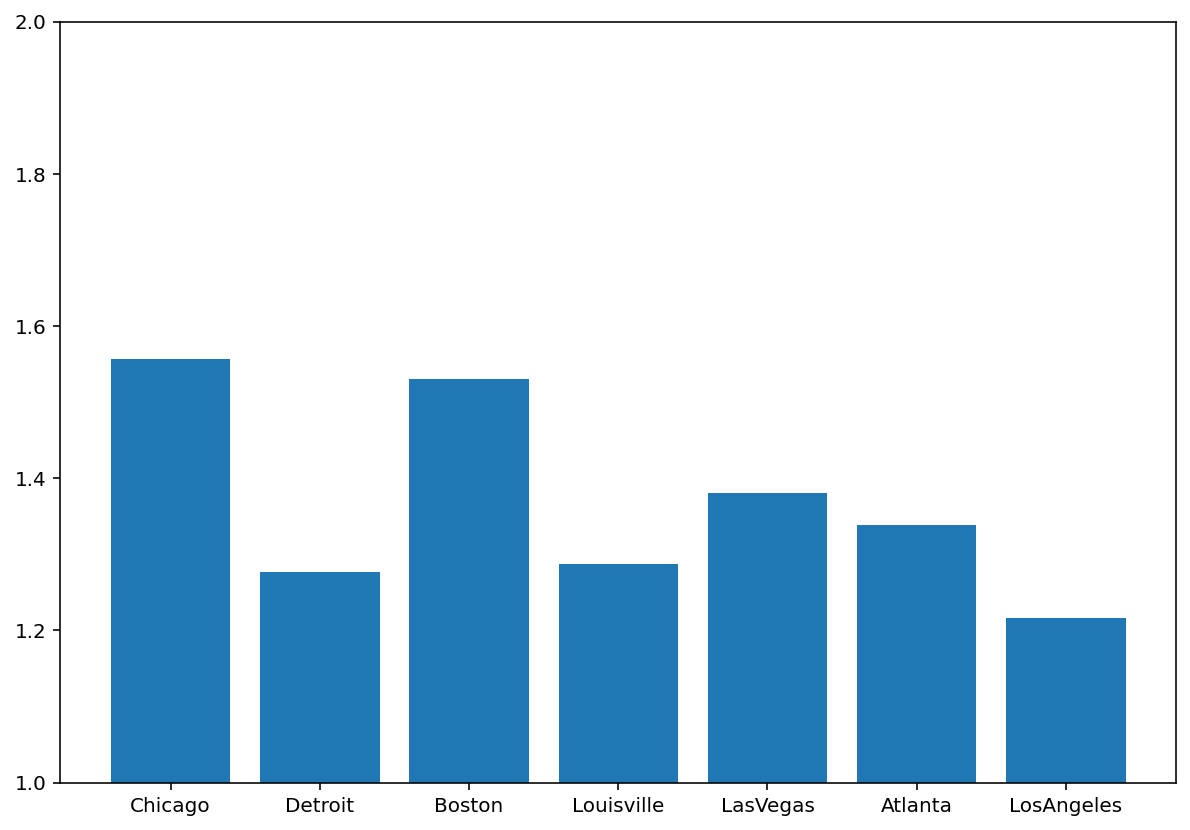

In [0]:
# Your codes go here...
cities = ['Chicago', 'Detroit', 'Boston', 'Louisville', 'LasVegas', 'Atlanta',
          'LosAngeles']

average_price = []

for city in cities:
  temp_df = df[df['region'] == city]
  average_price_df = temp_df['AveragePrice']
  mean_price = average_price_df.mean()
  average_price.append(mean_price)



fig, ax = plt.subplots(figsize=(10,7))
ax.bar(x=cities, height=average_price)
ax.set_ylim([1,2])
plt.show()

In [0]:
df.sort_values('Total Volume', ascending=False)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
9097,7,2018-02-04,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018,TotalUS
8366,47,2017-02-05,0.77,61034457.10,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS
5506,46,2016-02-07,0.76,52288697.89,16573573.78,20470572.61,2546439.11,12698112.39,9083373.04,3373077.87,241661.48,conventional,2016,TotalUS
8353,34,2017-05-07,1.09,47293921.60,17076650.82,13549102.59,863471.88,15804696.31,11228049.63,4324231.19,252415.49,conventional,2017,TotalUS
5493,33,2016-05-08,0.82,46324529.70,14223304.98,17896391.60,1993645.36,12211187.76,8747756.84,3342780.83,120650.09,conventional,2016,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13193,12,2016-10-02,1.49,472.82,10.50,18.99,0.00,443.33,440.00,3.33,0.00,organic,2016,MiamiFtLauderdale
11698,24,2015-07-12,2.05,419.98,0.00,63.42,0.00,356.56,356.56,0.00,0.00,organic,2015,Syracuse
13189,8,2016-10-30,1.58,385.55,8.13,47.42,0.00,330.00,330.00,0.00,0.00,organic,2016,MiamiFtLauderdale
9437,51,2015-01-04,1.73,379.82,0.00,59.82,0.00,320.00,320.00,0.00,0.00,organic,2015,BuffaloRochester
